In [1]:
import pandas as pd
df1 = pd.read_csv("Smallbox.csv")

In [2]:
df1

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [27]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import numpy as np

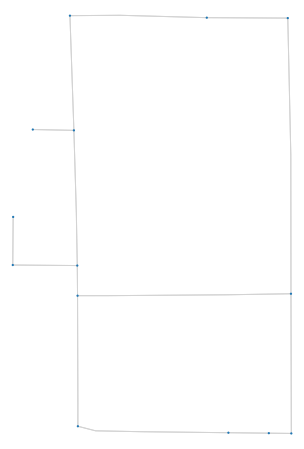

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [28]:
north, south, east, west = 35.581702,35.584546,-78.800222,-78.797915
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [29]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [30]:
start = [df1['Latitude'].loc[1],df1['Longitude'].loc[1]]
end = [df1['Latitude'].loc[2],df1['Longitude'].loc[2]]

In [93]:
path = nx.shortest_path(G, df1['Nodes'].loc[9],df1['Nodes'].loc[11], weight='travel_time')

In [94]:
def plot_path(lat, long, origin_point, destination_point):
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'grey')))
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    fig.update_layout(mapbox_style="carto-darkmatter",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [95]:
path

[7463971107, 195447518, 195447516, 7472627041, 7472627042]

In [96]:
lat1 = []
long1 = []
for i in path:
    lat1.append(G.nodes[i].get('y'))
    long1.append(G.nodes[i].get('x'))

In [97]:
type(path)

list

In [98]:
import pandas as pd
data = pd.DataFrame(path)
data.rename(columns = {0:'Nodes'}, inplace = True)
data['Latitude'] = lat1
data['Longitude'] = long1

In [99]:
data

,Nodes,Latitude,Longitude
0,7463971107,35.583698,-78.800076
1,195447518,35.583693,-78.799788
2,195447516,35.582924,-78.799764
3,7472627041,35.582927,-78.800216
4,7472627042,35.583201,-78.800213


In [100]:
long = [] 
lat = []  
for i in data.index:
    long.append(data.loc[i]["Longitude"])
    lat.append(data.loc[i]["Latitude"])

In [101]:
origin_point = (data.loc[0]["Latitude"], data.loc[0]["Longitude"]) 
destination_point = (data.loc[4]["Latitude"], data.loc[4]["Longitude"])

In [102]:
plot_path(lat, long, origin_point, destination_point)

In [105]:
G.nodes

NodeView((195438253, 195438255, 195438631, 195447516, 195447518, 195447520, 195500922, 195594836, 6359366687, 7463971107, 7472627041, 7472627042, 8739204976, 8739204978))

In [106]:
df1

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [108]:
data = df1

In [109]:
df1 = df1.drop(['Nodes'],axis=1)
df1.rename(columns = {'Latitude':'Left'}, inplace = True)
df1.rename(columns = {'Longitude':'Right'}, inplace = True)

In [110]:
df1

,Left,Right
0,35.582010,-78.799760
1,35.581969,-78.798268
2,35.584332,-78.798292
3,35.582924,-78.799764
4,35.583693,-78.799788
5,35.584345,-78.799816
6,35.582764,-78.798270
7,35.582753,-78.799763
8,35.584334,-78.798859
9,35.583698,-78.800076


In [111]:
import requests # to call the openmap/google apis
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{df1.loc[0, "Right"]},{df1.loc[0, "Left"]};{df1.loc[8, "Right"]},{df1.loc[8, "Left"]}?overview=false""")

In [112]:
import json
df3 = pd.DataFrame()
for j in df1.index:
    list1 = []
    for i in df1.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{df1.loc[j, "Right"]},{df1.loc[j, "Left"]};{df1.loc[i, "Right"]},{df1.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [113]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,135.3,397.7,101.7,187.2,259.8,217.7,82.6,346.4,213.3,142.5,172.9,121.1,95.5
1,135.3,0.0,262.8,237.0,322.6,395.1,88.4,218.0,314.1,348.6,277.8,308.3,14.2,39.8
2,397.7,262.8,0.0,296.0,210.4,137.9,174.4,315.0,51.3,236.5,336.8,367.3,277.1,302.7
3,101.7,237.0,296.0,0.0,85.6,158.1,154.1,19.0,244.7,111.6,40.8,71.3,222.8,197.2
4,187.2,322.6,210.4,85.6,0.0,72.6,239.6,104.6,159.2,26.1,126.4,156.8,308.4,282.8
5,259.8,395.1,137.9,158.1,72.6,0.0,312.2,177.1,86.6,98.6,198.9,229.4,380.9,355.3
6,217.7,88.4,174.4,154.1,239.6,312.2,0.0,135.1,225.7,265.7,194.9,225.4,102.6,128.2
7,82.6,218.0,309.5,19.0,104.6,177.1,135.1,0.0,263.7,130.6,59.8,90.3,203.8,178.2
8,346.4,314.1,51.3,244.7,159.2,86.6,225.7,263.7,0.0,185.2,285.5,316.0,328.3,441.9
9,333.6,469.0,356.9,232.0,146.4,219.0,386.1,251.0,305.6,0.0,233.8,264.3,454.8,429.2


In [114]:
df = df1

In [115]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [116]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-78.7997604, 35.58201),
 1: (-78.7982676, 35.5819692),
 2: (-78.7982923, 35.5843317),
 3: (-78.7997645, 35.5829241),
 4: (-78.7997882, 35.5836931),
 5: (-78.7998159, 35.5843454),
 6: (-78.79827, 35.5827637),
 7: (-78.7997627, 35.5827526),
 8: (-78.7988587, 35.584334),
 9: (-78.8000756, 35.5836978),
 10: (-78.8002157, 35.5829271),
 11: (-78.800213, 35.5832007),
 12: (-78.7984249, 35.5819707),
 13: (-78.7987076, 35.5819733)}

In [117]:
distances_df = df3
distances_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,135.3,397.7,101.7,187.2,259.8,217.7,82.6,346.4,213.3,142.5,172.9,121.1,95.5
1,135.3,0.0,262.8,237.0,322.6,395.1,88.4,218.0,314.1,348.6,277.8,308.3,14.2,39.8
2,397.7,262.8,0.0,296.0,210.4,137.9,174.4,315.0,51.3,236.5,336.8,367.3,277.1,302.7
3,101.7,237.0,296.0,0.0,85.6,158.1,154.1,19.0,244.7,111.6,40.8,71.3,222.8,197.2
4,187.2,322.6,210.4,85.6,0.0,72.6,239.6,104.6,159.2,26.1,126.4,156.8,308.4,282.8
5,259.8,395.1,137.9,158.1,72.6,0.0,312.2,177.1,86.6,98.6,198.9,229.4,380.9,355.3
6,217.7,88.4,174.4,154.1,239.6,312.2,0.0,135.1,225.7,265.7,194.9,225.4,102.6,128.2
7,82.6,218.0,309.5,19.0,104.6,177.1,135.1,0.0,263.7,130.6,59.8,90.3,203.8,178.2
8,346.4,314.1,51.3,244.7,159.2,86.6,225.7,263.7,0.0,185.2,285.5,316.0,328.3,441.9
9,333.6,469.0,356.9,232.0,146.4,219.0,386.1,251.0,305.6,0.0,233.8,264.3,454.8,429.2


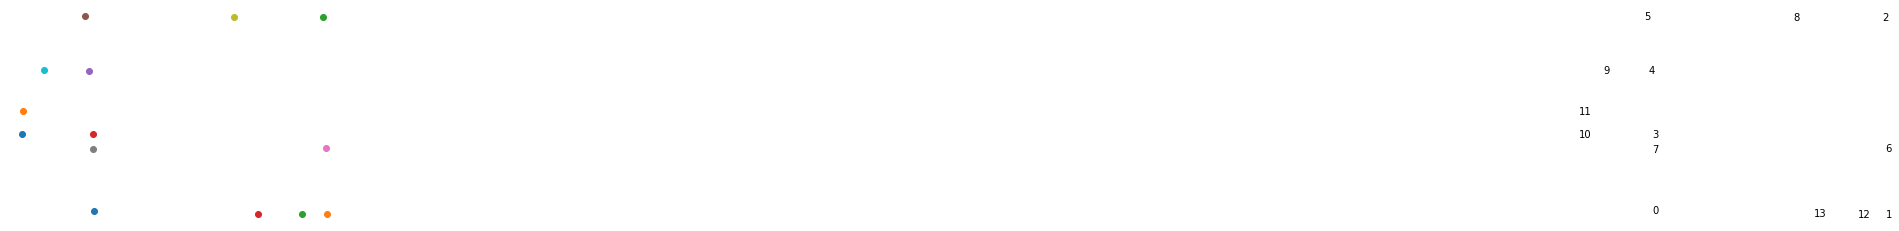

In [118]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [119]:
distance = distances_df


In [120]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 135.3,
 (0, 2): 397.7,
 (0, 3): 101.7,
 (0, 4): 187.2,
 (0, 5): 259.8,
 (0, 6): 217.7,
 (0, 7): 82.6,
 (0, 8): 346.4,
 (0, 9): 213.3,
 (0, 10): 142.5,
 (0, 11): 172.9,
 (0, 12): 121.1,
 (0, 13): 95.5,
 (1, 0): 135.3,
 (1, 2): 262.8,
 (1, 3): 237.0,
 (1, 4): 322.6,
 (1, 5): 395.1,
 (1, 6): 88.4,
 (1, 7): 218.0,
 (1, 8): 314.1,
 (1, 9): 348.6,
 (1, 10): 277.8,
 (1, 11): 308.3,
 (1, 12): 14.2,
 (1, 13): 39.8,
 (2, 0): 397.7,
 (2, 1): 262.8,
 (2, 3): 296.0,
 (2, 4): 210.4,
 (2, 5): 137.9,
 (2, 6): 174.4,
 (2, 7): 315.0,
 (2, 8): 51.3,
 (2, 9): 236.5,
 (2, 10): 336.8,
 (2, 11): 367.3,
 (2, 12): 277.1,
 (2, 13): 302.7,
 (3, 0): 101.7,
 (3, 1): 237.0,
 (3, 2): 296.0,
 (3, 4): 85.6,
 (3, 5): 158.1,
 (3, 6): 154.1,
 (3, 7): 19.0,
 (3, 8): 244.7,
 (3, 9): 111.6,
 (3, 10): 40.8,
 (3, 11): 71.3,
 (3, 12): 222.8,
 (3, 13): 197.2,
 (4, 0): 187.2,
 (4, 1): 322.6,
 (4, 2): 210.4,
 (4, 3): 85.6,
 (4, 5): 72.6,
 (4, 6): 239.6,
 (4, 7): 104.6,
 (4, 8): 159.2,
 (4, 9): 26.1,
 (4, 10): 126.4,
 (4,

In [121]:
V = 1

In [123]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [124]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [125]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [126]:
#constraints
for v in df.ID:
    cap = 1 if v != 2 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 2 and j!= 2) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [127]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 329 ms
Optimal


In [128]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [129]:
routes = get_next_loc(2)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=2:
        r.append(get_next_loc(r[-1][1])[-1])

In [130]:
routes

[[(2, 8),
  (8, 5),
  (5, 4),
  (4, 9),
  (9, 10),
  (10, 11),
  (11, 3),
  (3, 7),
  (7, 0),
  (0, 13),
  (13, 12),
  (12, 1),
  (1, 6),
  (6, 2)]]

In [131]:
order = [2,8,5,4,9,10,11,3,7,0,13,12,1,6]

In [134]:
df2 = df[['Left', 'Right', 'ID']].copy()

In [135]:
df2.rename(columns = {'Left':'Latitude'}, inplace = True)
df2.rename(columns = {'Right':'Longitude'}, inplace = True)

In [136]:
df3 = pd.DataFrame()
for i in order:
    #print(df1.loc[i])
    df3 = df3.append(df2.loc[i])

In [137]:
df3

,Latitude,Longitude,ID
2,35.584332,-78.798292,2.0
8,35.584334,-78.798859,8.0
5,35.584345,-78.799816,5.0
4,35.583693,-78.799788,4.0
9,35.583698,-78.800076,9.0
10,35.582927,-78.800216,10.0
11,35.583201,-78.800213,11.0
3,35.582924,-78.799764,3.0
7,35.582753,-78.799763,7.0
0,35.582010,-78.799760,0.0


In [138]:
df3.reset_index(inplace = True)
df3 = df3.append(df3.loc[0])

In [139]:
df3.reset_index(inplace = True)

In [140]:
long2 = [] 
lat2 = []  
for i in df3.index:
    long2.append(df3.loc[i]["Longitude"])
    lat2.append(df3.loc[i]["Latitude"])

In [141]:
origin_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"]) 
destination_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"])

In [142]:
plot_path(lat2, long2, origin_point2, destination_point2)

In [143]:
path

[7463971107, 195447518, 195447516, 7472627041, 7472627042]

In [147]:
data

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [148]:
path1 = [195447518, 195447516]

In [149]:
lat1 = []
long1 = []
for i in path1:
    lat1.append(G.nodes[i].get('y'))
    long1.append(G.nodes[i].get('x'))

In [156]:
import pandas as pd
data1 = pd.DataFrame(path1)
data1.rename(columns = {0:'Nodes'}, inplace = True)
data
data1['Latitude'] = lat1
data1['Longitude'] = long1

In [157]:
data1

,Nodes,Latitude,Longitude
0,195447518,35.583693,-78.799788
1,195447516,35.582924,-78.799764


In [158]:
data

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [160]:
data.loc[9.5] = data1.loc[0]
data.loc[9.6] = data1.loc[1]

data = data.sort_index().reset_index(drop=True)

In [161]:
data

,Nodes,Latitude,Longitude
0,1.954383e+08,35.582010,-78.799760
1,1.954383e+08,35.581969,-78.798268
2,1.954386e+08,35.584332,-78.798292
3,1.954475e+08,35.582924,-78.799764
4,1.954475e+08,35.583693,-78.799788
5,1.954475e+08,35.584345,-78.799816
6,1.955009e+08,35.582764,-78.798270
7,1.955948e+08,35.582753,-78.799763
8,6.359367e+09,35.584334,-78.798859
9,7.463971e+09,35.583698,-78.800076


In [162]:
df3

,level_0,index,Latitude,Longitude,ID
0,0,2.0,35.584332,-78.798292,2.0
1,1,8.0,35.584334,-78.798859,8.0
2,2,5.0,35.584345,-78.799816,5.0
3,3,4.0,35.583693,-78.799788,4.0
4,4,9.0,35.583698,-78.800076,9.0
5,5,10.0,35.582927,-78.800216,10.0
6,6,11.0,35.583201,-78.800213,11.0
7,7,3.0,35.582924,-78.799764,3.0
8,8,7.0,35.582753,-78.799763,7.0
9,9,0.0,35.582010,-78.799760,0.0


In [174]:
import pandas as pd
df1 = pd.read_csv("Smallbox.csv")

In [175]:
data = df1

In [176]:
data

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [198]:
data = data.append(data1,ignore_index=True)

In [201]:
data

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [202]:
data1

,Nodes,Latitude,Longitude
0,195447518,35.583693,-78.799788
1,195447516,35.582924,-78.799764


In [279]:
order = [2,8,5,4,9,14,15,10,3,7,0,13,12,1,6]

In [280]:
data.rename(columns = {'Left':'Latitude'}, inplace = True)
data.rename(columns = {'Right':'Longitude'}, inplace = True)

In [281]:
df3 = pd.DataFrame()
for i in order:
    #print(df1.loc[i])
    df3 = df3.append(data.loc[i])

In [282]:
df3

,Nodes,Latitude,Longitude
2,1.954386e+08,35.584332,-78.798292
8,6.359367e+09,35.584334,-78.798859
5,1.954475e+08,35.584345,-78.799816
4,1.954475e+08,35.583693,-78.799788
9,7.463971e+09,35.583698,-78.800076
14,1.954475e+08,35.583693,-78.799788
15,1.954475e+08,35.582924,-78.799764
10,7.472627e+09,35.582927,-78.800216
3,1.954475e+08,35.582924,-78.799764
7,1.955948e+08,35.582753,-78.799763


In [283]:
df3.reset_index(inplace = True)
df3 = df3.append(df3.loc[0])
df3.reset_index(inplace = True)

In [284]:
long2 = [] 
lat2 = []  
for i in df3.index:
    long2.append(df3.loc[i]["Longitude"])
    lat2.append(df3.loc[i]["Latitude"])

In [285]:
origin_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"]) 
destination_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"])

In [286]:
plot_path(lat2, long2, origin_point2, destination_point2)

In [288]:
df3

,level_0,index,Nodes,Latitude,Longitude
0,0,2.0,1.954386e+08,35.584332,-78.798292
1,1,8.0,6.359367e+09,35.584334,-78.798859
2,2,5.0,1.954475e+08,35.584345,-78.799816
3,3,4.0,1.954475e+08,35.583693,-78.799788
4,4,9.0,7.463971e+09,35.583698,-78.800076
5,5,14.0,1.954475e+08,35.583693,-78.799788
6,6,15.0,1.954475e+08,35.582924,-78.799764
7,7,10.0,7.472627e+09,35.582927,-78.800216
8,8,3.0,1.954475e+08,35.582924,-78.799764
9,9,7.0,1.955948e+08,35.582753,-78.799763


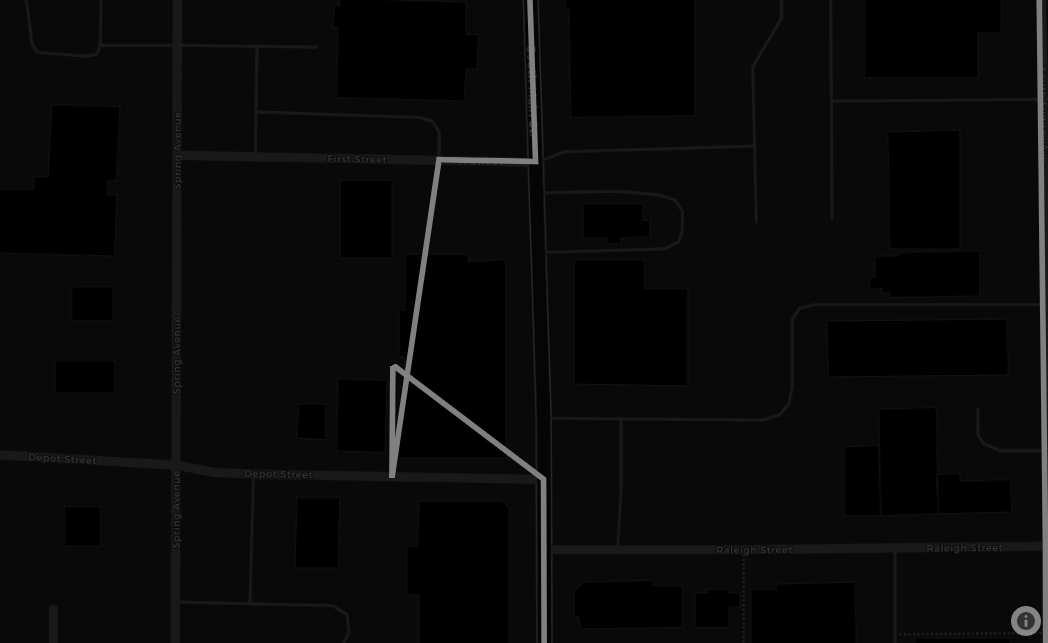

In [1]:
from IPython.display import Image
Image(filename = "wrongpath.png", width = 600, height = 300)

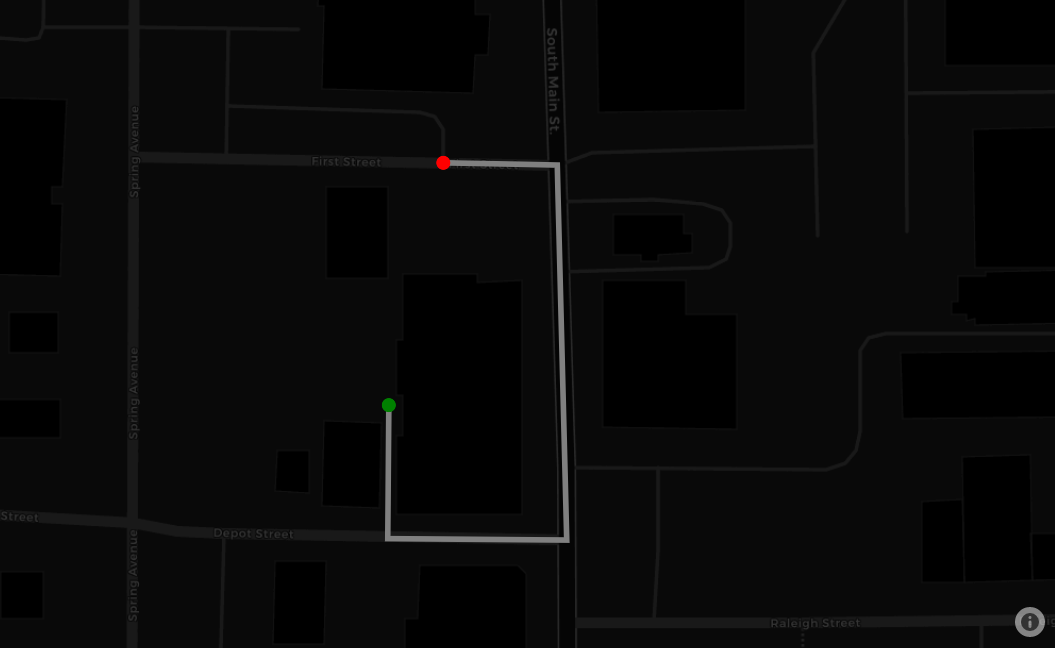

In [2]:
Image(filename = "correctpath.png", width = 600, height = 300)